In [148]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# cofigure seaborn
sns.set(style='whitegrid', context='notebook', palette='deep')

In [149]:
# Load data
df = pd.read_csv('../data/rent_Valencia_cleaned.csv')
df

,propertyCode,numPhotos,floor,price,propertyType,size,exterior,rooms,bathrooms,latitude,...,priceByArea,hasPlan,has3DTour,has360,hasStaging,topNewDevelopment,newDevelopmentFinished,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice
0,97693036,30,11,1500.0,penthouse,80.0,True,3,2,39.101077,...,19.0,False,False,False,False,False,True,True,True,0.0
1,98039610,18,3,1600.0,flat,193.0,True,4,1,39.420725,...,8.0,False,False,False,False,False,True,False,False,0.0
2,98042660,9,3,850.0,flat,110.0,True,3,1,39.463590,...,8.0,False,False,False,False,False,True,False,False,0.0
3,98042528,29,3,950.0,flat,101.0,True,3,2,39.479151,...,9.0,False,False,True,False,False,True,False,False,0.0
4,98042519,18,0,900.0,flat,45.0,True,1,1,39.474174,...,20.0,False,False,False,False,False,True,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,97334169,19,1,450.0,flat,86.0,True,2,2,39.264424,...,5.0,False,False,False,False,False,True,False,False,0.0
2596,88772862,8,0,500.0,flat,60.0,True,1,1,39.516912,...,8.0,False,False,False,False,False,True,False,False,0.0
2597,94396615,9,4,600.0,flat,45.0,True,1,1,39.475969,...,13.0,False,False,False,False,False,True,False,False,0.0
2598,98010151,0,2,560.0,flat,126.0,True,4,2,39.512175,...,4.0,False,False,False,False,False,True,False,False,0.0


In [150]:
# Data to be clustered
X = df[['propertyCode', 'latitude', 'longitude']]
X

,propertyCode,latitude,longitude
0,97693036,39.101077,-0.224147
1,98039610,39.420725,-0.342421
2,98042660,39.463590,-0.327468
3,98042528,39.479151,-0.380205
4,98042519,39.474174,-0.382997
...,...,...,...
2595,97334169,39.264424,-0.470856
2596,88772862,39.516912,-0.366585
2597,94396615,39.475969,-0.390168
2598,98010151,39.512175,-0.415782


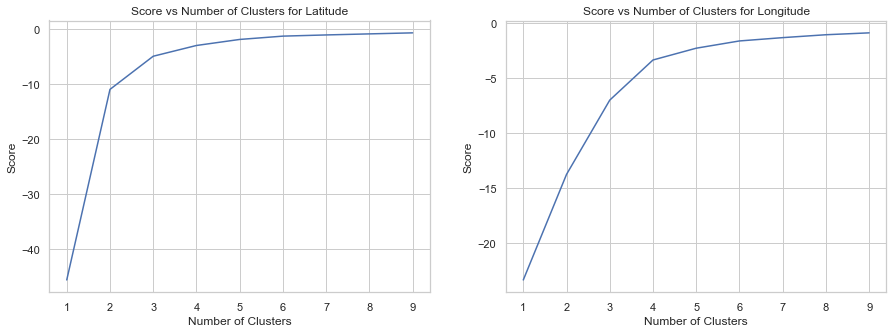

In [151]:
# Elbow method to find the optimal number of clusters
k_cluster = range(1, 10)

k_means = [KMeans(n_clusters=i) for i in k_cluster]

y_axis = df[['latitude']]
x_axis = df[['longitude']]

score_y = [k_means[i].fit(y_axis).score(y_axis) for i in range(len(k_means))]
score_x = [k_means[i].fit(x_axis).score(x_axis) for i in range(len(k_means))]

# Visualize
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(k_cluster, score_y)
ax[0].set_title('Score vs Number of Clusters for Latitude')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Score')

ax[1].plot(k_cluster, score_x)
ax[1].set_title('Score vs Number of Clusters for Longitude')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Score')
plt.show()

In [152]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point

X

C:\Users\carlo\AppData\Local\Temp\ipykernel_1692\2312045325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])


,propertyCode,latitude,longitude,cluster_label
0,97693036,39.101077,-0.224147,1
1,98039610,39.420725,-0.342421,0
2,98042660,39.463590,-0.327468,0
3,98042528,39.479151,-0.380205,0
4,98042519,39.474174,-0.382997,0
...,...,...,...,...
2595,97334169,39.264424,-0.470856,0
2596,88772862,39.516912,-0.366585,0
2597,94396615,39.475969,-0.390168,0
2598,98010151,39.512175,-0.415782,0


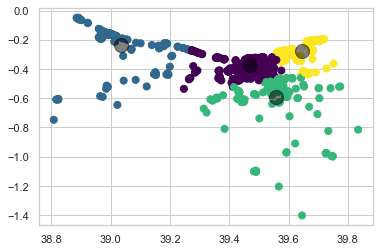

In [153]:
# Visualize the clusters
plt.scatter(X['latitude'], X['longitude'], c=X['cluster_label'], s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [154]:
# merge the dataframe with the cluster labels on propertyCode
df_clustered = pd.merge(df, X[['propertyCode', 'cluster_label']], on='propertyCode')
df_clustered

,propertyCode,numPhotos,floor,price,propertyType,size,exterior,rooms,bathrooms,latitude,...,hasPlan,has3DTour,has360,hasStaging,topNewDevelopment,newDevelopmentFinished,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice,cluster_label
0,97693036,30,11,1500.0,penthouse,80.0,True,3,2,39.101077,...,False,False,False,False,False,True,True,True,0.0,1
1,98039610,18,3,1600.0,flat,193.0,True,4,1,39.420725,...,False,False,False,False,False,True,False,False,0.0,0
2,98042660,9,3,850.0,flat,110.0,True,3,1,39.463590,...,False,False,False,False,False,True,False,False,0.0,0
3,98042528,29,3,950.0,flat,101.0,True,3,2,39.479151,...,False,False,True,False,False,True,False,False,0.0,0
4,98042519,18,0,900.0,flat,45.0,True,1,1,39.474174,...,False,False,False,False,False,True,False,False,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,97334169,19,1,450.0,flat,86.0,True,2,2,39.264424,...,False,False,False,False,False,True,False,False,0.0,0
2596,88772862,8,0,500.0,flat,60.0,True,1,1,39.516912,...,False,False,False,False,False,True,False,False,0.0,0
2597,94396615,9,4,600.0,flat,45.0,True,1,1,39.475969,...,False,False,False,False,False,True,False,False,0.0,0
2598,98010151,0,2,560.0,flat,126.0,True,4,2,39.512175,...,False,False,False,False,False,True,False,False,0.0,0


### Bonus: Visualizing the clusters on a map

In [155]:
import folium
from folium import plugins
import matplotlib.cm as cm
import matplotlib.colors as colors

In [156]:
latitude =  39.4702 # Valencia's center latitude
longitude = -0.376805 # Valencia's center longitude

map_valencia = folium.Map(location=[latitude, longitude], zoom_start=9) # Create map

In [157]:
# Create a marker for each cluster
for i in range(len(centers)):
    folium.Marker(
        location=[centers[i][0], centers[i][1]],
        popup=str(i),
        icon=folium.Icon(color='red')
    ).add_to(map_valencia)

In [158]:
# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# color the map according to the clusters
clusters = folium.map.FeatureGroup()

for i in range(len(df_clustered)):
    color = rainbow[df_clustered.iloc[i]['cluster_label']]
    clusters.add_child(folium.CircleMarker(
        location=[df_clustered.iloc[i]['latitude'], df_clustered.iloc[i]['longitude']],
        radius=5,
        popup=df_clustered.iloc[i]['price'],
        color=color,
        fill=True,
        fill_opacity=0.7
    ))

map_valencia.add_child(clusters)
map_valencia

It is a great way to see how the clusters are distributed geographically, this would be a powerful tool for our analysis. 

In [159]:
# Save map
map_valencia.save('../data/map_valencia.html')

# Drop latitude and longitude columns
df_clustered.drop(['latitude', 'longitude'], axis=1, inplace=True)

# Save dataframe
df_clustered.to_csv('../data/df_clustered.csv', index=False)

In [160]:
df_clustered

,propertyCode,numPhotos,floor,price,propertyType,size,exterior,rooms,bathrooms,hasVideo,...,hasPlan,has3DTour,has360,hasStaging,topNewDevelopment,newDevelopmentFinished,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice,cluster_label
0,97693036,30,11,1500.0,penthouse,80.0,True,3,2,True,...,False,False,False,False,False,True,True,True,0.0,1
1,98039610,18,3,1600.0,flat,193.0,True,4,1,False,...,False,False,False,False,False,True,False,False,0.0,0
2,98042660,9,3,850.0,flat,110.0,True,3,1,False,...,False,False,False,False,False,True,False,False,0.0,0
3,98042528,29,3,950.0,flat,101.0,True,3,2,False,...,False,False,True,False,False,True,False,False,0.0,0
4,98042519,18,0,900.0,flat,45.0,True,1,1,False,...,False,False,False,False,False,True,False,False,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,97334169,19,1,450.0,flat,86.0,True,2,2,True,...,False,False,False,False,False,True,False,False,0.0,0
2596,88772862,8,0,500.0,flat,60.0,True,1,1,False,...,False,False,False,False,False,True,False,False,0.0,0
2597,94396615,9,4,600.0,flat,45.0,True,1,1,False,...,False,False,False,False,False,True,False,False,0.0,0
2598,98010151,0,2,560.0,flat,126.0,True,4,2,False,...,False,False,False,False,False,True,False,False,0.0,0
